In [1]:
import sys
import matplotlib
if 'matplotlib.pyplot' not in sys.modules.keys():
    matplotlib.use("Agg")
import matplotlib.pyplot as plt
import json
import numpy as np
import pickle 

%matplotlib notebook

## Path to Data File Output by Realtime Parser
path = "./crex2_launch/H'
file_name = "data_file_115k_usbserial-FT5RIYEN3.txt"

## Option to use parsed data for plots IF have already parsed the specified file and saved as pickle file.
use_pickle = True ## Specifies whether to use parsed data from pickle file [True] or to parse data in original text file [False].

dataFile = path + file_name

DeltInx=[100, 300, 200]

class IMUData():
    def __init__(self):

        self.time = []; self.temp = []
        self.ax = []; self.ay = []; self.az = []
        self.mx = []; self.my = []; self.mz = []
        self.gx = []; self.gy = []; self.gz = []
        
class SweepData():
    def __init__(self):
        self.time = []
        self.pip0 = []; self.pip1 = [];
        
class PayloadData():
    def __init__(self):
        self.rawData = ''
        self.imu = IMUData()
        self.sweeps = SweepData()
        self.macAddress = ''
        self.rssiData = []
        self.shieldID = 0
        
# Functions for merging bytes
def combine2(a, b):
    return (a << 8) | b
def combine4(a, b, c, d):
    return (a << 24) | (b << 16) | (c << 8) | d

# Functions for saving data
def convertDataToLists(dataSet):
    dataSet.imu.ax = dataSet.imu.ax.tolist()
    dataSet.imu.ay = dataSet.imu.ay.tolist()
    dataSet.imu.az = dataSet.imu.az.tolist()
    dataSet.imu.mx = dataSet.imu.mx.tolist()
    dataSet.imu.my = dataSet.imu.my.tolist()
    dataSet.imu.mz = dataSet.imu.mz.tolist()
    dataSet.imu.gx = dataSet.imu.gx.tolist()
    dataSet.imu.gy = dataSet.imu.gy.tolist()
    dataSet.imu.gz = dataSet.imu.gz.tolist()
    dataSet.imu.temp = dataSet.imu.temp.tolist()
    dataSet.imu.time = dataSet.imu.time.tolist()
    dataSet.sweeps.time = dataSet.sweeps.time.tolist()
    dataSet.sweeps.pip0 = dataSet.sweeps.pip0.tolist()
    dataSet.sweeps.pip1 = dataSet.sweeps.pip1.tolist()
    return dataSet

def makeJSONFile (fname, payloadData):
    f = open(fname, 'w')
    # Convert into lists and dictionaries for JSON storage
    payloadData = convertDataToLists(payloadData)
    JSONDict = {}
    # First the IMU data
    imu = payloadData.imu
    imuData = {"time":imu.time, "temp":imu.temp,
               "ax":imu.ax, "ay":imu.ay, "az":imu.az,
               "mx":imu.mx, "my":imu.my, "mz":imu.mz,
               "gx":imu.gx, "gy":imu.gy, "gz":imu.gz}
    JSONDict["imu"] = imuData
    # Then the sweep data
    sweeps = payloadData.sweeps
    sweepData = {"id":sweeps.payloadID, "time":sweeps.time, "pip0":sweeps.pip0, "pip1":sweeps.pip1}
    JSONDict["sweeps"] = sweepData

    json.dump(JSONDict, f)
    f.close()

# Padding time data (as lists)Z
def timefix(l, new, dt):   # l = time data as list, new = empty list, dt = delta t
    for t in l:
        if l.index(t) >= 2:
            # replace bad timewords
            if t - l[l.index(t) - 1] < 0 or t - l[l.index(t) - 1] > 1:
                l[l.index(t) - 1] = l[l.index(t) - 2] + dt
                t = l[l.index(t) - 1] + dt
                
def get_pickles(path, file_name, DeltInx=[100, 300, 200]):
    import pickle
    pklfname = path+"ParsedData_wDInx%sto%s-%s.pkl" % (DeltInx[0], DeltInx[1], file_name.partition(".")[0])
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    shieldID=dct['shieldID']; imuPlot=dct['imuPlot']
    axPlot=dct['axPlot']; ayPlot=dct['ayPlot']; azPlot=dct['azPlot']
    gxPlot=dct['gxPlot']; gyPlot=dct['gyPlot']; gzPlot=dct['gzPlot']
    mxPlot=dct['mxPlot']; myPlot=dct['myPlot']; mzPlot=dct['mzPlot']
    tempPlot=dct['tempPlot']; sweepPlot=dct['sweepPlot']; pip0Plot=dct['pip0Plot']; pip1Plot=dct['pip1Plot']
    sweepTimeLPlot=dct['sweepTimeLPlot']; pip0LPlot=dct['pip0LPlot']; pip1LPlot=dct['pip1LPlot']
    pklf.close()
    del dct
    magfullPlot = mxPlot**2+myPlot**2+mzPlot**2
    return shieldID, imuPlot, axPlot, ayPlot, azPlot, gxPlot, gyPlot, gzPlot, mxPlot, myPlot, mzPlot, tempPlot, sweepPlot, pip0Plot, pip1Plot, sweepTimeLPlot, pip0LPlot, pip1LPlot, magfullPlot

In [2]:
########### Load Pickle File ##############
if use_pickle: 
    # path = "./wallops_intDel/LaunchDay7_20210516-Dallas/"
    # file_name = "PreLaunchAndFlight-data_file_230k_1-05_16_21.txt"
    # version="Original"
    # pklfname = path+"FlightTimeParsedData_wDInx%sto%s-%s-%s.pkl" % (DeltInx[0], DeltInx[1], file_name.partition(".")[0], version)
    pklfname = path+"ParsedData_wDInx%sto%s-%s.pkl" % (DeltInx[0], DeltInx[1], file_name.partition(".")[0])
    pklf = open(pklfname, "rb")
    dct = pickle.load(pklf)
    shieldID=dct['shieldID']; imuPlot=dct['imuPlot']
    axPlot=dct['axPlot']; ayPlot=dct['ayPlot']; azPlot=dct['azPlot']
    gxPlot=dct['gxPlot']; gyPlot=dct['gyPlot']; gzPlot=dct['gzPlot']
    mxPlot=dct['mxPlot']; myPlot=dct['myPlot']; mzPlot=dct['mzPlot']
    tempPlot=dct['tempPlot']; sweepPlot=dct['sweepPlot']; pip0Plot=dct['pip0Plot']; pip1Plot=dct['pip1Plot']
    sweepTimeLPlot=dct['sweepTimeLPlot']; pip0LPlot=dct['pip0LPlot']; pip1LPlot=dct['pip1LPlot']
    pklf.close()
    del dct
    magfullPlot = mxPlot**2+myPlot**2+mzPlot**2
    print "Pickle File Loaded. \n\nProcceed Directly to \"Plotting Section\" of Notebook!"
else: 
    print "Using Data File Output from Realtime Parser"

Pickle File Loaded. 

Procceed Directly to "Plotting Section" of Notebook!


In [ ]:
########### Load the data file ###########
f = open(dataFile, 'r')
rawData = f.read()
print "Opened file:", dataFile

# Create payload objects and store parsed data
mainPIPData = PayloadData()
mainPIPData.rawData = rawData
payloads = [mainPIPData]

########### Parse by data type for each payload ###########
strict_parse = False # Require a pound symbol at the end of the data
for payload in payloads:
    payloadrawData = payload.rawData
    imu = []
    sweeps = []
    # 2 PIPs with 28 2-byte samples + 4-byte timestamp + ID
    sweepSamples = 28
    numSweepBytes = sweepSamples * 2 * 2 + 4 + 1
    # 9 2-byte data points + 2-byte temp + 4-byte timestamp
    numIMUBytes = 24
    
    pntr = 0
    while pntr < len(payloadrawData):
        # Check message start sentinels and not at end
        if payloadrawData[pntr] == '#' and (len(payloadrawData)-pntr) >= numIMUBytes:
            if payloadrawData[pntr+1] == 'I':
                # If not the last, check message end sentinel
                if pntr+2+numIMUBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numIMUBytes] == '#':
                        imu.append(payloadrawData[pntr+2:pntr+2+numIMUBytes])
                # Or just add the last message
                else:
                    imu.append(payloadrawData[pntr+2:pntr+2+numIMUBytes])
                pntr += 1
            elif payloadrawData[pntr+1] == 'S':
                if  pntr+2+numSweepBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numSweepBytes] == '#':
                        sweeps.append(payloadrawData[pntr+2:pntr+2+numSweepBytes])
                else:
                    sweeps.append(payloadrawData[pntr+2:pntr+2+numSweepBytes])
                pntr += 1
            else:
                pntr += 1
        else:
            pntr += 1
    print("Num IMU Messages: %s" %len(imu))
    print("Num Sweep Messages: %s" %len(sweeps))

    ########### Build data structures ###########
    # First the IMU/IMU Buffer
    imuTime = [];
    ax = []; ay = []; az = []
    mx = []; my = []; mz = []
    gx = []; gy = []; gz = []
    temp = [];
    
    for i in imu:
        if len(i) == numIMUBytes:
            imuTime.append(combine4(ord(i[3]), ord(i[2]), ord(i[1]), ord(i[0])))
            # The byte order is reversed, but the data sets are not
            ax.append(combine2(ord(i[5]), ord(i[4])))
            ay.append(combine2(ord(i[7]), ord(i[6])))
            az.append(combine2(ord(i[9]), ord(i[8])))
            mx.append(combine2(ord(i[11]), ord(i[10])))
            my.append(combine2(ord(i[13]), ord(i[12])))
            mz.append(combine2(ord(i[15]), ord(i[14])))
            gx.append(combine2(ord(i[17]), ord(i[16])))
            gy.append(combine2(ord(i[19]), ord(i[18])))
            gz.append(combine2(ord(i[21]), ord(i[20])))
            temp.append(combine2(ord(i[23]), ord(i[22])))
    
    imuTime = np.array(imuTime, dtype='uint32')
    ax = np.array(ax, dtype='int16')
    ay = np.array(ay, dtype='int16')
    az = np.array(az, dtype='int16')
    mx = np.array(mx, dtype='int16')
    my = np.array(my, dtype='int16')
    mz = np.array(mz, dtype='int16')
    gx = np.array(gx, dtype='int16')
    gy = np.array(gy, dtype='int16')
    gz = np.array(gz, dtype='int16')
    temp = np.array(temp, dtype='int16')

    payload.imu.time = imuTime
    payload.imu.ax = ax
    payload.imu.ay = ay
    payload.imu.az = az
    payload.imu.mx = mx
    payload.imu.my = my
    payload.imu.mz = mz
    payload.imu.gx = gx
    payload.imu.gy = gy
    payload.imu.gz = gz
    payload.imu.temp = temp

    # Then the sweeps
    payloadID = [];
    sweepTime = []
    allSweepsPIP0 = []
    individualSweepsPIP0 = []
    allSweepsPIP1 = []
    individualSweepsPIP1 = []
    PIP0StartByte = 4 + 1                             # Four for time, one payload ID  
    PIP0StopByte = PIP0StartByte + sweepSamples*2   # Number of samples, two bytes each
    PIP1StopByte = PIP0StopByte + sweepSamples*2      # Number of samples, two bytes each
    
    for i in sweeps:
        if len(i) == numSweepBytes:
            sweepTime.append(combine4(ord(i[3]), ord(i[2]), ord(i[1]), ord(i[0])))
            payloadID.append(ord(i[4]))
            tempSweep = []
            for byte in xrange(PIP0StartByte,PIP0StopByte,2):
                allSweepsPIP0.append(combine2(ord(i[byte+1]), ord(i[byte])))
                tempSweep.append(combine2(ord(i[byte+1]), ord(i[byte])))
            individualSweepsPIP0.append(tempSweep)
            tempSweep = []
            for byte in xrange(PIP0StopByte,PIP1StopByte,2):
                allSweepsPIP1.append(combine2(ord(i[byte+1]), ord(i[byte])))
                tempSweep.append(combine2(ord(i[byte+1]), ord(i[byte])))
            individualSweepsPIP1.append(tempSweep)
                       
    payloadMatch = (len(set(payloadID)) == 1)
    if payloadMatch:
        print("Payload ID's match. This was payload #%s." %payloadID[0])
    else:
        print("Payload ID's don't match. Something went wrong...")
        
    sweepTime = np.array(sweepTime, dtype='uint32')
    individualSweepsPIP0 = np.array(individualSweepsPIP0, dtype='int16')
    individualSweepsPIP1 = np.array(individualSweepsPIP1, dtype='int16')
    payload.shieldID = payloadID[0]
    payload.sweeps.time = sweepTime
    payload.sweeps.pip0 = individualSweepsPIP0
    payload.sweeps.pip1 = individualSweepsPIP1

Opened file: ./crex2_launch/HotCount/data_file_115k_usbserial-FT5RIYEN1.txt


In [4]:
################################## Forming and Scaling Data ##################################### 

sweepSize = 28
sweepStepDt = 0.02 / sweepSize

# Define as None for no limits
timeMin = None # 485 produces better plots than 480
timeMax = None

# Set by the time limits automatically
timesToSkip = 30 # To impove the quality of sample numbering selection
IMUSampleMin = None
IMUSampleMax = None
SweepSampleMin = None
SweepSampleMax = None

for payload in payloads:
    # Extract data from each set, cast into arrays
    aScale = 4*9.8; mScale = 1.; gScale = 2000./360
    
    imuTime = np.array(payload.imu.time)/1.E6;
    sweepTime = np.array(payload.sweeps.time)/1.E6
    
    # Figure out what the sample bounds should be
    if timeMin:
        IMUSampleMin = np.where(imuTime>=timeMin)[0][timesToSkip]
        IMUSampleMax = np.where(imuTime<=timeMax)[0][-1 * timesToSkip]
        SweepSampleMin = np.where(sweepTime>=timeMin)[0][timesToSkip]
        SweepSampleMax = np.where(sweepTime<=timeMax)[0][-1 * timesToSkip]
    imuTime = imuTime[IMUSampleMin:IMUSampleMax]
    sweepTime = sweepTime[SweepSampleMin:SweepSampleMax]
    
    ############################################################
    ##Bringing in from parse_erpabob-2 to use for lineplots
    # Flatten out sweepSampleTime 
    sweepSampleTime = []
    for t in sweepTime:
        for n in range(0, sweepSize):
            sweepSampleTime.append(t+sweepStepDt*n)
    sweepSampleTime = np.array(sweepSampleTime)
    
    pip0 = np.array(payload.sweeps.pip0)*5./2**14
    pip1 = np.array(payload.sweeps.pip1)*5./2**14
    pip1L = pip1.flatten();
    pip0L = pip0.flatten();
    ############################################################
     
    # Make everything an array
    
    temp = payload.imu.temp[IMUSampleMin:IMUSampleMax];
    ax = np.array(payload.imu.ax[IMUSampleMin:IMUSampleMax])*aScale/2**15
    ay = np.array(payload.imu.ay[IMUSampleMin:IMUSampleMax])*aScale/2**15
    az = np.array(payload.imu.az[IMUSampleMin:IMUSampleMax])*aScale/2**15
    mx = np.array(payload.imu.mx[IMUSampleMin:IMUSampleMax])*mScale/2**15
    my = np.array(payload.imu.my[IMUSampleMin:IMUSampleMax])*mScale/2**15
    mz = np.array(payload.imu.mz[IMUSampleMin:IMUSampleMax])*mScale/2**15
    gx = np.array(payload.imu.gx[IMUSampleMin:IMUSampleMax])*gScale/2**15
    gy = np.array(payload.imu.gy[IMUSampleMin:IMUSampleMax])*gScale/2**15
    gz = np.array(payload.imu.gz[IMUSampleMin:IMUSampleMax])*gScale/2**15
    shieldID = payload.shieldID
    pip0 = np.array(payload.sweeps.pip0)*5./2**14
    pip1 = np.array(payload.sweeps.pip1)*5./2**14
    
    print("Data Scaled")
############################ Padding Data #######################################

    # Change time data to list form for padding
    imuList = imuTime.tolist()
    sweepList = sweepTime.tolist()
    
    # Find correct delta t
    imuDelt = round(((imuList[DeltInx[1]] - imuList[DeltInx[0]]) / DeltInx[2]), 4)
    sweepDelt = round(((sweepList[DeltInx[1]] - sweepList[DeltInx[0]]) / DeltInx[2]), 4)
    
    print("Deltas found")
    
    newImuTime =  []
    newSweepTime = []
    
    # iterate through IMU twice to better fill gaps
    timefix(imuList, newImuTime, imuDelt)
    timefix(imuList, newImuTime, imuDelt)
    print("IMU Done")
    
    # iterate through sweep
    timefix(sweepList, newSweepTime, sweepDelt)
    timefix(sweepList, newSweepTime, sweepDelt)
    print("Sweep Done")
    
    # change back to array
    imuList = np.array(imuList)
    sweepList = np.array(sweepList)
        
    # reshape all data
    ax = np.reshape(ax, (len(ax), 1))
    ay = np.reshape(ay, (len(ay), 1))
    az = np.reshape(az, (len(az), 1))
    gx = np.reshape(gx, (len(gx), 1))
    gy = np.reshape(gy, (len(gy), 1))
    gz = np.reshape(gz, (len(gz), 1))
    mx = np.reshape(mx, (len(mx), 1))
    my = np.reshape(my, (len(my), 1))
    mz = np.reshape(mz, (len(mz), 1))
    temp = np.reshape(temp, (len(temp), 1))
    
    print("All Done")

Data Scaled
Deltas found
IMU Done
Sweep Done
All Done


In [5]:
#### Give Audio Indication that Parsing Complete ####
import os
os.system('say "Done parsing data."')
print ""

In [6]:
# Changes screen voltage to nA
# ** Set for CREX-2 shield values right now **

highV2I = 1.0/(320.0E-3)
lowV2I = 1.0/(160.0E-3)
# lowV2I = 1.0/(40.0E-3)
# lowV2I = 1.0/(120.0E-3)

# # ** CREX-2 shield values ** #
if np.any(shieldID == np.array([8, 10])): 
    pip0V2I = highV2I
    pip1V2I = highV2I
elif np.any(shieldID == np.array([9, 11])):
    pip0V2I = lowV2I
    pip1V2I = lowV2I
    
# # ** Delamere shield values ** #
# if np.any(shieldID == np.array([14, 16, 17, 22])):
#     pip0V2I = highV2I
#     pip1V2I = lowV2I
# elif np.any(shieldID == np.array([18, 21])): 
#     pip0V2I = lowV2I
#     pip1V2I = lowV2I
# else: #Shield 19 and 20 
#     pip0V2I = highV2I
#     pip1V2I = highV2I

pip0nA = (pip0-1)*pip0V2I
pip1nA = (pip1-1)*pip1V2I

In [7]:
#### Save Parsed Data to a Pickle File ####
## Can skip this cell if do not want to save to pickle file!
dct = dict()
# version="Original"
dct['shieldID']=shieldID;
dct['imuPlot']=imuList; dct['axPlot']=ax; dct['ayPlot']=ay; dct['azPlot']=az
dct['gxPlot']=gx; dct['gyPlot']=gy; dct['gzPlot']=gz; dct['mxPlot']=mx; dct['myPlot']=my; dct['mzPlot']=mz
dct['tempPlot']=temp; dct['sweepPlot']=sweepList; dct['sweepTimeLPlot']=sweepSampleTime
dct['pip0Plot']=pip0nA; dct['pip1Plot']=pip1nA; dct['pip0LPlot']=pip0L; dct['pip1LPlot']=pip1L
# pklfname = path+"ParsedData_wDInx%sto%s-%s-%s.pkl" % (DeltInx[0], DeltInx[1], file_name.partition(".")[0], version)
pklfname = path+"ParsedData_wDInx%sto%s-%s.pkl" % (DeltInx[0], DeltInx[1], file_name.partition(".")[0])
pklf = open(pklfname, "wb"); pickle.dump(dct, pklf); pklf.close()
print pklfname
del pklf, pklfname, dct

./crex2_launch/HotCount/ParsedData_wDInx100to300-data_file_115k_usbserial-FT5RIYEN1.pkl


In [8]:
#### Assign Plotting Variables ####
imuPlot = imuList
axPlot = ax
ayPlot = ay
azPlot = az
gxPlot = gx
gyPlot = gy
gzPlot = gz
mxPlot = mx
myPlot = my
mzPlot = mz
magfullPlot = mxPlot**2+myPlot**2+mzPlot**2
tempPlot = temp
sweepPlot = sweepList
pip0Plot = pip0nA
pip1Plot = pip1nA 

pip0LPlot = pip0L
pip1LPlot = pip1L
sweepTimeLPlot = sweepSampleTime

# Plotting Section

In [18]:
####*** Set Limits For Plots(if Desired) ***####
## No Limits Option ##
xlims = None
cplt_kwargs = {'pip0': {}, 'pip1':{}}
pip0L_ylim, pip1L_ylim = None, None
ac_ylim, mag_ylim, gyro_ylim = None, None, None
cad_ylim = None

## Set Limits Below ##
xlims = [1494.451, 2330] #X-Axis Limits for IMU & PIP lineplots and PIP Colorplots
xlims = [1650, 2335] #X-Axis Limits for IMU & PIP lineplots and PIP Colorplots
#ac_ylim = [-12, 12] # Accel Plot Y-Axis Limits
#mag_ylim = [-0.05, 0.15] # Mag Plot Y-Axis Limits
#gyro_ylim = [-0.375, 0.375] # Gyro Plot Y-Axis Limits
#pip0L_ylim, pip1L_ylim = [1.00, 1.02], [0.99, 1.01] #Y-Axis Limits for PIP0 and PIP1 lineplots, respectively.
#cad_ylim = [20,45] # Y-Axis limits for cadance plots.
# cplt_kwargs={'pip0':{'vmin':0 'vmax':10},'pip1':{'vmin':0, 'vmax':10}} #Colorbar Limits for PIP Colorplots

<IPython.core.display.Javascript object>


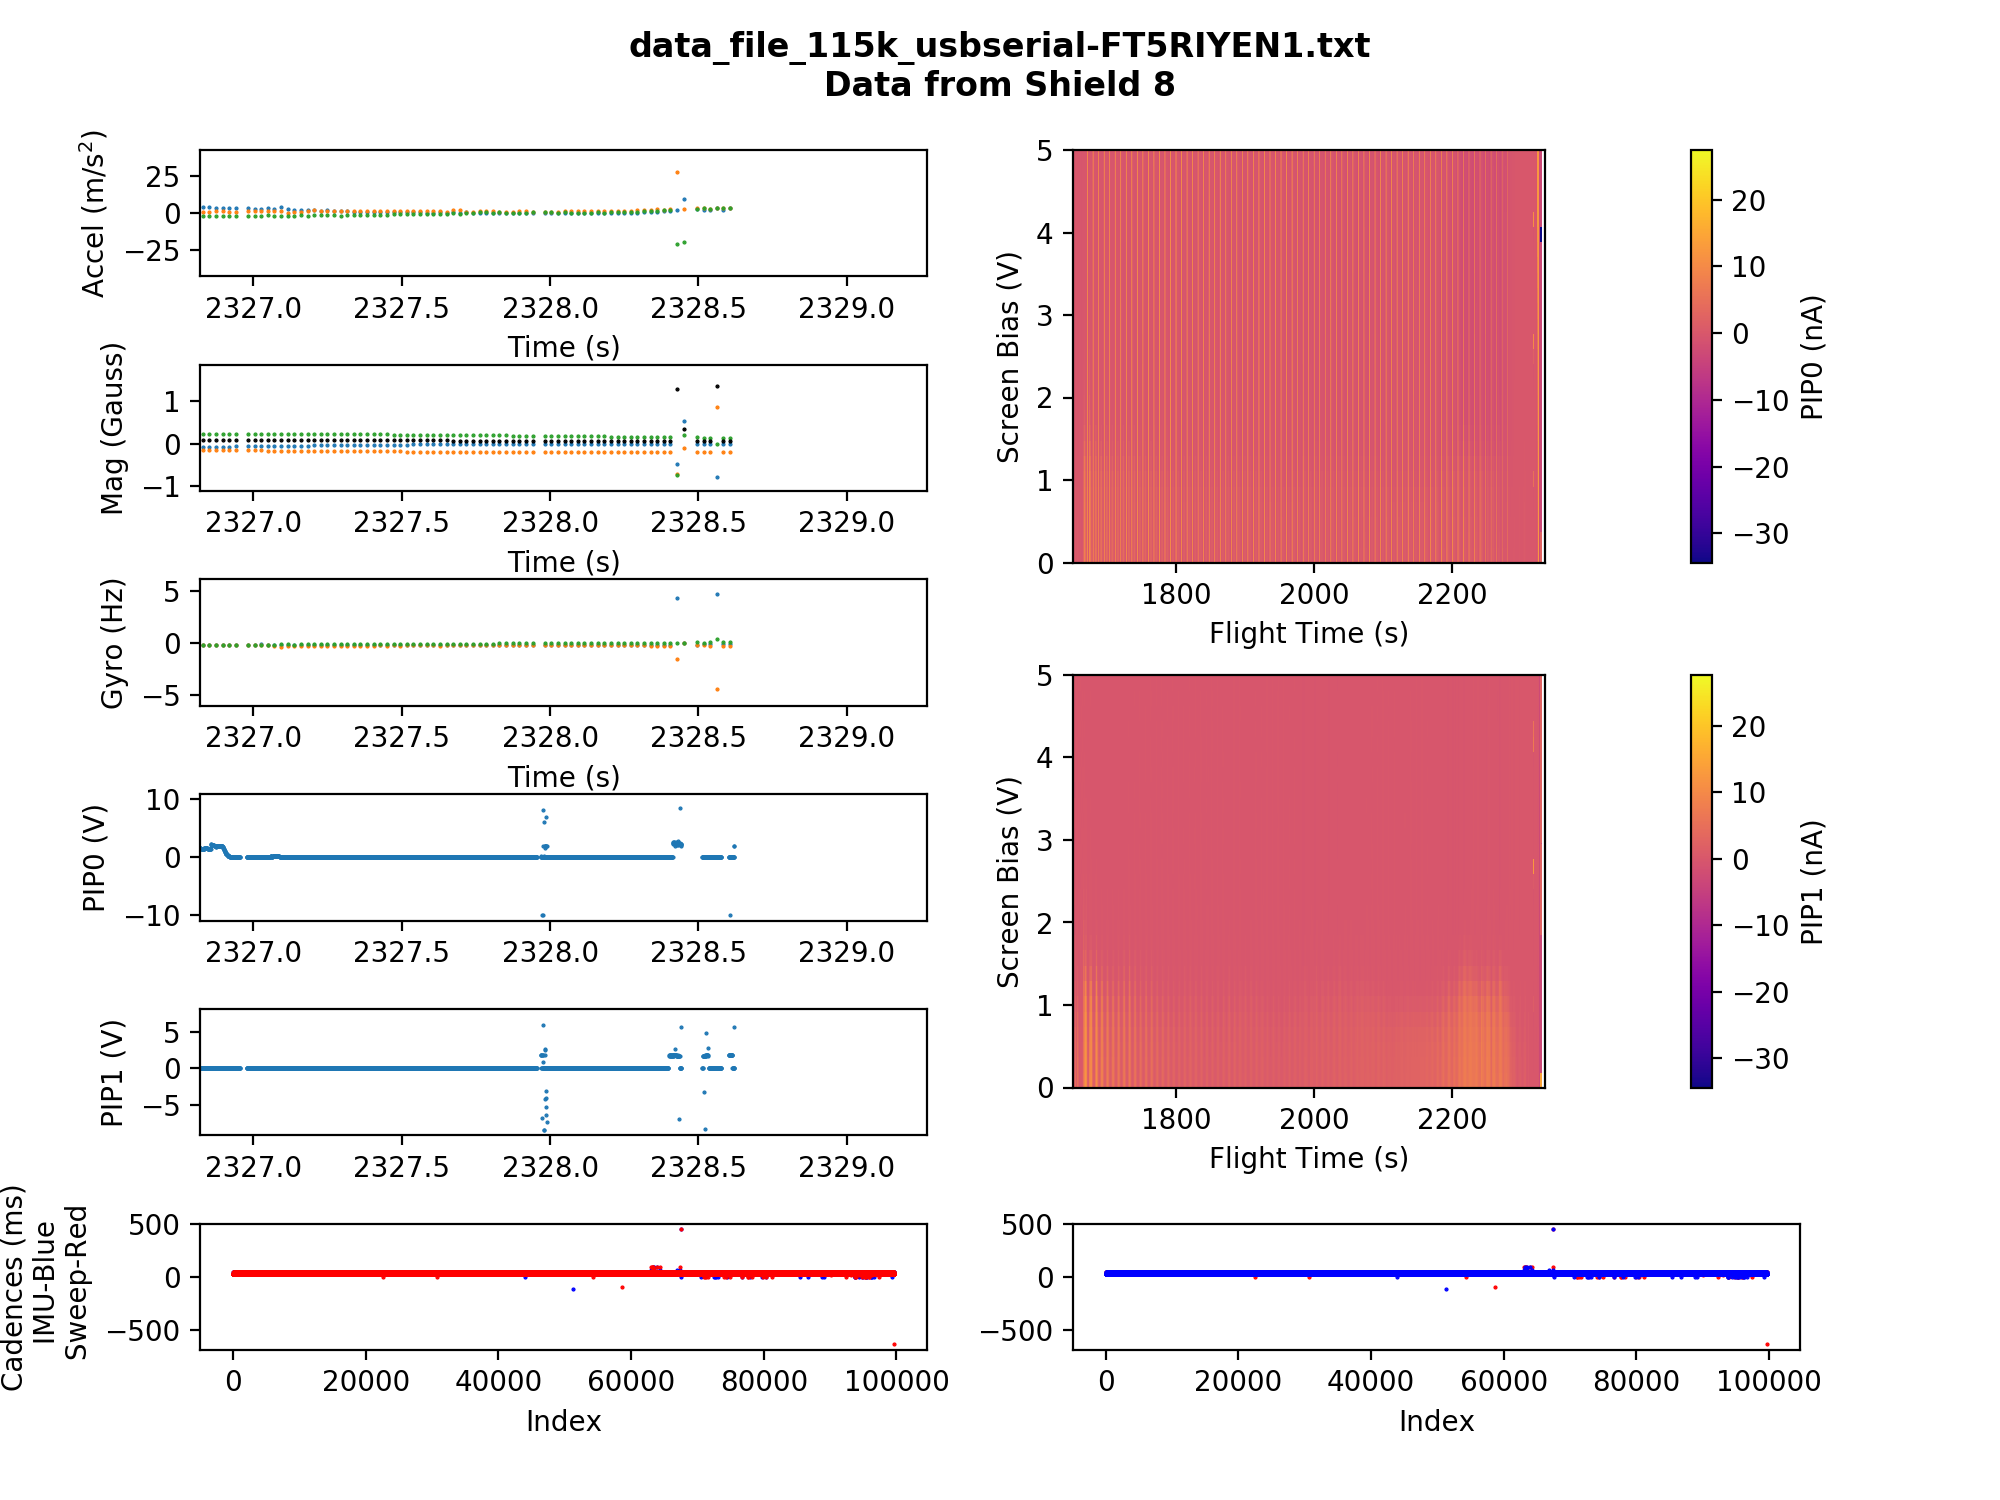

1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done
9 Done


In [19]:
matplotlib.use('nbagg')
import matplotlib.cm as cm
# import scipy.signal as sig
# from scipy.interpolate import interp1d
# from scipy.io import savemat, loadmat
from __future__ import division

dots = True

gs_left = plt.GridSpec(6, 2,  hspace=0.7)

# Set up dots or not more cleanly
line_style = '-'
if dots:
    line_style = '.'

markersize = 1

fig = plt.figure(figsize=(10, 7.5))

# Accel
axis1 = fig.add_subplot(gs_left[0,0])
plt.plot(imuPlot, axPlot, line_style, markersize=markersize, label='ax') 
plt.plot(imuPlot, ayPlot, line_style, markersize=markersize, label='ay')  
plt.plot(imuPlot, azPlot, line_style, markersize=markersize, label='az') 
plt.ylabel("Accel (m/s$^2$)")
plt.ylim(ac_ylim)
#plt.ylim([-2, 2])
#plt.xlim([75, 100])
plt.xlabel("Time (s)")
print ("1 Done")

# Mag
fig.add_subplot(gs_left[1,0], sharex=axis1)
plt.plot(imuPlot, mxPlot, line_style, markersize=markersize, label='mx') 
plt.plot(imuPlot, myPlot, line_style, markersize=markersize, label='my')  
plt.plot(imuPlot, mzPlot, line_style, markersize=markersize, label='mz') 
plt.plot(imuPlot, magfullPlot, line_style, markersize=markersize, color='black', label='magfull')
plt.ylim(mag_ylim)
#plt.ylim([-0.2, 0.25])
plt.ylabel("Mag (Gauss)")
plt.xticks(visible=True)
plt.xlabel("Time (s)")
print ("2 Done")

# Gyro
fig.add_subplot(gs_left[2,0], sharex=axis1)
plt.plot(imuPlot, gxPlot, line_style, markersize=markersize, label='gx') 
plt.plot(imuPlot, gyPlot, line_style, markersize=markersize, label='gy')  
plt.plot(imuPlot, gzPlot, line_style, markersize=markersize, label='gz') 
plt.ylabel("Gyro (Hz)")
plt.ylim(gyro_ylim)
#plt.ylim([-0.5, 0.5])  
#plt.xlim([75, 100])
plt.xticks(visible=True)
plt.xlabel("Time (s)")
print ("3 Done")

# First PIP (line)
fig.add_subplot(gs_left[3,0], sharex=axis1)
plt.plot(sweepTimeLPlot, pip0LPlot, line_style, markersize=markersize)
plt.ylabel("PIP0 (V)")
plt.ylim(pip0L_ylim)
#plt.ylim([1.01, 1.03])
#plt.ylim([1.0075, 1.0125])
# plt.xlim(xlims)
print("4 Done")

# Second PIP (line)
fig.add_subplot(gs_left[4,0], sharex=axis1)
plt.plot(sweepTimeLPlot, pip1LPlot, line_style, markersize=markersize)
plt.ylim(pip1L_ylim)
#plt.ylim([1.027, 1.033])
#plt.ylim([1.011, 1.013])
# plt.xlim(xlims2)
plt.xlim(xlims)
plt.ylabel("PIP1 (V)")
print("5 Done")

# Cadence (sweep on top)
axis2 = fig.add_subplot(gs_left[5,0])
plt.plot(np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
plt.ylim(cad_ylim)
#plt.ylim([22,25])
#plt.xlim([200,400])
plt.ylabel("Cadences (ms)\n IMU-Blue\n Sweep-Red")
plt.xlabel("Index")
## Uncomment the lines below (& Comment the relavent lines above) to get Time on x-axis
# plt.plot(imuPlot[1:], np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
# plt.plot(sweepPlot[1:], np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
# plt.xlabel("Time")
print ("6 Done")

# Cadence (imu on top)
fig.add_subplot(gs_left[5,1], sharex=axis2, sharey=axis2)
plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
plt.plot(np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
plt.ylim(cad_ylim)
#plt.ylim([22,25])
#plt.xlim([200,400])
plt.xlabel("Index")
## Uncomment the lines below (& Comment the relavent lines above) to get Time on x-axis
# plt.plot(sweepPlot[1:], np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
# plt.plot(imuPlot[1:], np.diff(imuPlot*1E3), line_style, color='blue', markersize=markersize)
# plt.xlabel("Time")
print ("7 Done")
    
# **Plot sweep time vs sweep data (Color plots)**

# commands to reorient pip array to match with other axes
pip0_rot = np.rot90(pip0Plot, k=1, axes=(0, 1))
pip1_rot = np.rot90(pip1Plot, k=1, axes=(0, 1))

sweep_voltage = np.linspace(0,5,28)

line_style = '-'

ax1 = plt.subplot2grid((5,2),(0,1),rowspan = 2)
plt.pcolormesh(sweepPlot, sweep_voltage, pip0_rot, cmap='plasma', **cplt_kwargs['pip0'])
plt.xlim(xlims)
ax1.set_xlabel("Flight Time (s)")
ax1.set_ylabel("Screen Bias (V)")
cb = plt.colorbar(pad = 0.2)
cb.set_label("PIP0 (nA)")
print ("8 Done")

ax1 = plt.subplot2grid((5,2),(2,1),rowspan = 2, sharex=ax1)
plt.pcolormesh(sweepPlot, sweep_voltage, pip1_rot, cmap='plasma', **cplt_kwargs['pip1'])
# plt.xlim(xlims2)
plt.xlim(xlims)
ax1.set_xlabel("Flight Time (s)")
ax1.set_ylabel("Screen Bias (V)")
cb = plt.colorbar(pad = 0.2)
cb.set_label("PIP1 (nA)")
print ("9 Done")
        
# Adjust figure
fig.subplots_adjust(right=.90)
fig.subplots_adjust(left=0.10)
fig.subplots_adjust(top=0.90)
fig.subplots_adjust(bottom=0.10)
fig.subplots_adjust(hspace=0.75)
    
plt.suptitle(file_name+"\n"+"Data from Shield %s" 
             %(shieldID), fontweight='bold')
    
plt.show()


In [7]:
print imuPlot[np.where(ayPlot<-25)[0]]
# print imuPlot[np.where(azPlot<-25)[0]]

[1806.674464 1877.429172 2195.652164 2320.072368]


In [7]:
shield8_T0 = 1494.026664
shield9_T0 = 1495.616272
shield10_T0 = 1494.108168
shield11_T0 = 1494.053868

np.mean(np.array([shield8_T0, shield9_T0, shield10_T0, shield11_T0]))

1494.451243

In [16]:
print np.max(sweepPlot)
print sweepPlot[-1]

2328.6034440000008
2327.968884


In [17]:
print np.where(np.max(sweepPlot)==sweepPlot)[0]
print len(sweepPlot)-1

[99659]
99660
